<a href="https://colab.research.google.com/github/yasuhiroinoue/AppMathSci/blob/main/%E5%BF%9C%E7%94%A8%E6%95%B0%E7%90%86(Adv.01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install qiskit_ibm_runtime
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/13

In [2]:
from google.colab import userdata
ibm_token = userdata.get('ibm_token')

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# Authenticate to IBM Quantum account
QiskitRuntimeService.save_account(
    ibm_token,
    channel='ibm_quantum', overwrite=True  # Specify the channel here
)
service = QiskitRuntimeService()

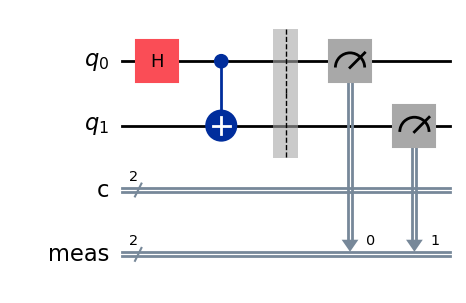

In [7]:
# Create a 2-qubit circuit
circuit = QuantumCircuit(2, 2)
circuit.h(0)  # Apply Hadamard gate
circuit.cx(0, 1)  # Apply CNOT gate
circuit.measure_all()
circuit.draw('mpl')

In [15]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 56.0 MB/s eta 0:00:00


In [18]:
from qiskit_aer import AerSimulator
# AerSimulator
simulator = AerSimulator()

# 回路をコンパイルして実行
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1024)

# 結果を取得
result = job.result()

# 測定結果の取得
counts = result.get_counts(circuit)
print("\nTotal counts are:", counts)



Total counts are: {'00 00': 502, '11 00': 522}


In [20]:
# Select the least busy available backend
backend = service.least_busy(operational=True, simulator=False)
print(f"Selected backend: {backend}")

# Transpile the circuit with optimization level 1
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

# Execute using the Sampler primitive
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1024  # Options can be set using auto-complete.
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")

Selected backend: <IBMBackend('ibm_kyiv')>
Job ID is cy5jx247v8tg008fa2j0


In [21]:
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

Counts for the meas output register: {'00': 522, '11': 489, '01': 8, '10': 5}


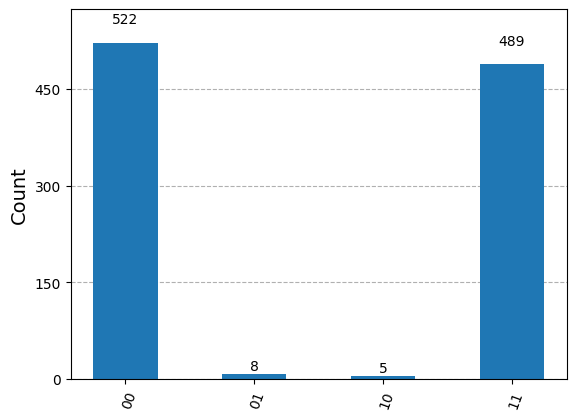

In [22]:
from qiskit.visualization import plot_histogram

# Display the histogram
plot_histogram(pub_result.data.meas.get_counts())